<a href="https://colab.research.google.com/github/saish15/Machine-Learning/blob/master/Data_Analysis_on_Energy_Efficient_MCS_and_Throughput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Libraries**

In [1]:
#import dependencies
%matplotlib inline
import os

#start python imports
import math, time, random, datetime

#data manupilation
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize

#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')



In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/PHD"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2004210318_model2_dataset.csv


In [3]:
data= os.listdir('../content/drive/My Drive/PHD')
data

['2004210318_model2_dataset.csv']

**2.Dataset**

In [4]:
# Import Jose dataset
ener_data= pd.read_csv('../content/drive/My Drive/PHD/2004210318_model2_dataset.csv')
ener_data

date  ... failed_experiment
0     2020-04-21T02:19:43.921414Z  ...                 0
1     2020-04-21T02:20:36.921488Z  ...                 0
2     2020-04-21T02:21:29.921459Z  ...                 0
3     2020-04-21T02:22:22.921413Z  ...                 0
4     2020-04-21T02:23:16.921412Z  ...                 0
...                           ...  ...               ...
5440  2020-04-25T17:59:28.615032Z  ...                 1
5441  2020-04-25T18:03:58.254811Z  ...                 1
5442  2020-04-25T18:08:27.872860Z  ...                 1
5443  2020-04-25T18:12:57.589993Z  ...                 1
5444  2020-04-25T18:13:50.589993Z  ...                 0

[5445 rows x 40 columns]

In [5]:
#check data types
ener_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 5445 non-null   object 
 1   cpu_platform         5445 non-null   object 
 2   BW                   5445 non-null   int64  
 3   TM                   5445 non-null   int64  
 4   UL/DL                5445 non-null   object 
 5   traffic_load         5445 non-null   int64  
 6   txgain               5445 non-null   int64  
 7   cpu_time             5445 non-null   int64  
 8   number_active_cores  5445 non-null   int64  
 9   pinning              5445 non-null   int64  
 10  cpu_config           5445 non-null   object 
 11  selected_mcs         5445 non-null   int64  
 12  selected_airtime     5445 non-null   float64
 13  mean_used_mcs        5389 non-null   float64
 14  bsr                  5389 non-null   float64
 15  num_ues              5389 non-null   f

In [6]:
ener_data.dtypes

date                    object
cpu_platform            object
BW                       int64
TM                       int64
UL/DL                   object
traffic_load             int64
txgain                   int64
cpu_time                 int64
number_active_cores      int64
pinning                  int64
cpu_config              object
selected_mcs             int64
selected_airtime       float64
mean_used_mcs          float64
bsr                    float64
num_ues                float64
thr                    float64
gput                   float64
mean_snr               float64
var_snr                float64
bler                   float64
turbodec_it            float64
rssi_mean              float64
rssi_var               float64
overflows              float64
underflows             float64
lates                  float64
dec_time               float64
pm_power               float64
pm_var                 float64
n_pm                     int64
rapl_power             float64
rapl_var

In [7]:
ener_data.dtypes.value_counts()

float64    23
int64      13
object      4
dtype: int64

In [8]:
ener_data.describe()

BW      TM  ...  fixed_mcs_flag  failed_experiment
count  5445.0  5445.0  ...          5445.0        5445.000000
mean     50.0     0.0  ...             1.0           0.089991
std       0.0     0.0  ...             0.0           0.286195
min      50.0     0.0  ...             1.0           0.000000
25%      50.0     0.0  ...             1.0           0.000000
50%      50.0     0.0  ...             1.0           0.000000
75%      50.0     0.0  ...             1.0           0.000000
max      50.0     0.0  ...             1.0           1.000000

[8 rows x 36 columns]

**3.Plots of Throughput Vs Other Parameters**

In [9]:
ener_data.groupby('txgain')['thr'].max().sort_index()

txgain
20     4.798776
21     7.020193
22     7.013915
23     7.023031
24     9.188065
25     9.188215
26    11.901427
27    13.036557
28    14.837584
29    16.481965
30    19.097583
31    19.184697
32    20.422004
33    22.862583
34    23.010375
35    22.965341
36    22.937406
37    23.025521
38    22.942799
39    23.029833
40    22.954830
41    22.960236
42    23.000894
43    22.937576
44    22.971158
45    23.017538
46    22.905023
47    22.939719
48    22.934920
49    22.924712
50    22.936436
51    22.950866
52    23.013472
53    22.951933
54    22.976681
55    22.911410
56    22.957036
57    22.975235
58    22.934448
59    22.961583
60    22.977257
61    22.937469
62    22.989225
63    22.977171
64    22.934838
65    22.966820
66    22.977910
67    22.981197
68    22.996777
69    22.968978
70    22.913145
71    22.930639
72    22.979474
73    22.925900
74    22.974241
Name: thr, dtype: float64

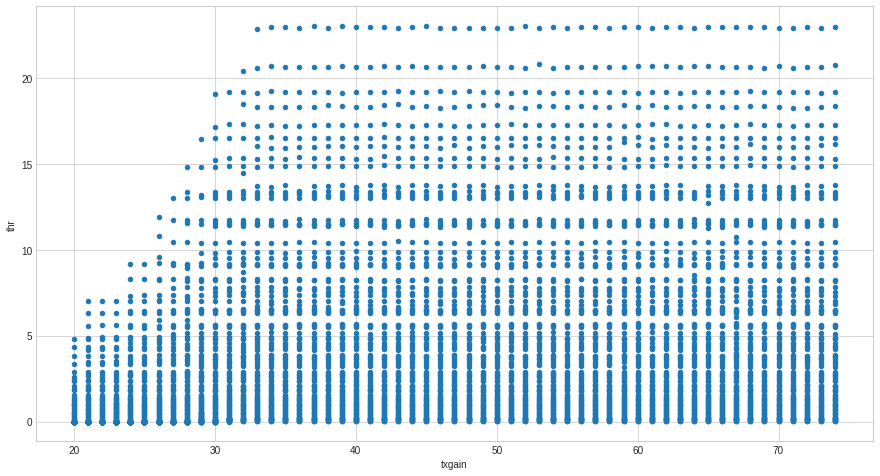

In [10]:
#Plot of Tx Gain Vs Throughput

'"We can see for txgain>30 throughput is higher above 25"'

ener_data.plot(x ='txgain', y='thr', kind = 'scatter',figsize=(15,8))

In [11]:
ener_data.groupby('selected_mcs')['thr'].max().sort_index()

selected_mcs
0      1.269939
3      2.634550
6      4.822415
9      7.033667
12     9.238263
15    13.088046
18    16.574526
21    19.273809
23    23.029833
Name: thr, dtype: float64

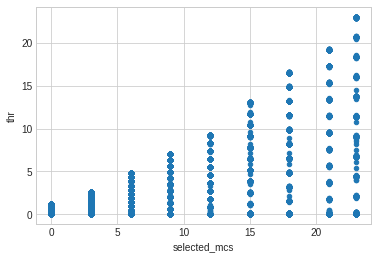

In [12]:
#Plot of MCS VS Throughput

'"For higher value of MCS throughput achieved is more, Throughput is max for selected MCS>20"'

ener_data.plot(x ='selected_mcs', y='thr', kind = 'scatter')

In [13]:
ener_data.groupby('selected_airtime')['thr'].max().sort_index()

selected_airtime
0.01     0.233878
0.10     2.210595
0.20     4.543052
0.30     6.888167
0.40     9.205120
0.50    11.550643
0.60    13.799417
0.70    16.261714
0.80    18.501247
0.90    20.816980
1.00    23.029833
Name: thr, dtype: float64

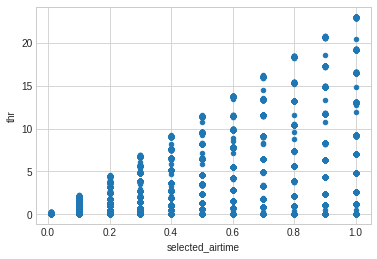

In [14]:
#Plot of airtime VS throughput

'"As airtime is increased throughput is increased an it is max for airtime value 1"'

ener_data.plot(x ='selected_airtime', y='thr', kind = 'scatter')

In [15]:
ener_data.groupby('pm_power')['thr'].max().sort_index()

pm_power
10.24447     0.012816
10.24863     0.462340
10.25192     0.000000
10.26501     0.944667
10.26958     0.026106
              ...    
13.93527    13.088046
13.93545    14.837584
13.98207    11.577617
14.06076    20.422004
14.12526    18.525172
Name: thr, Length: 5382, dtype: float64

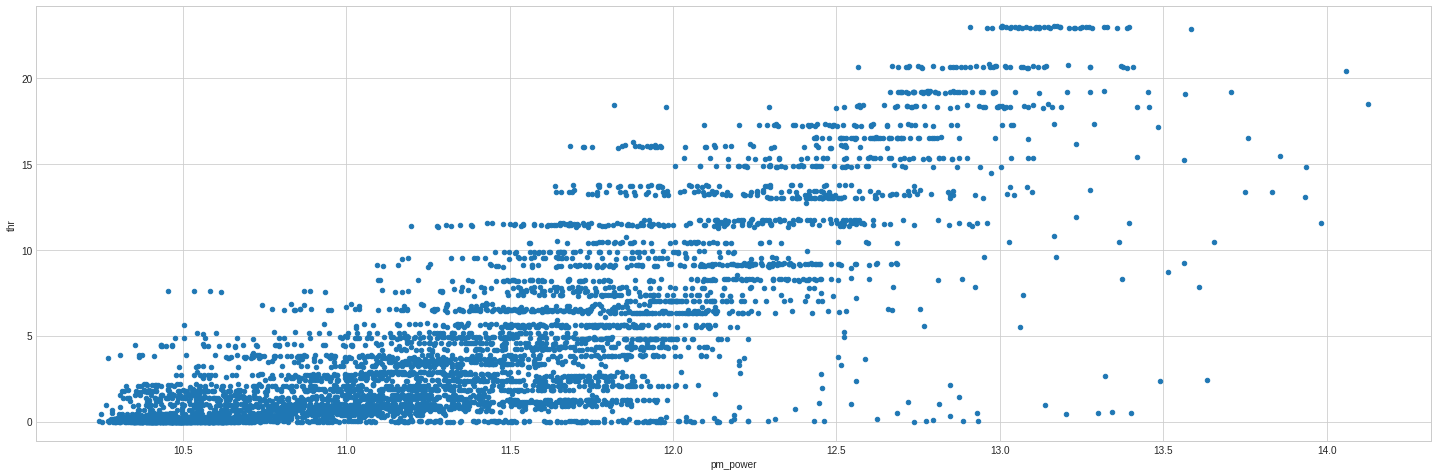

In [16]:
#Power VS Throughput

'"As Power is increased throughput is increased, throughput is max at power>12.8 and it starts decreasing for power>13.6 "'

ener_data.plot(x ='pm_power', y='thr', kind = 'scatter', figsize=(25,8))

In [17]:
ener_data.groupby('bler')['thr'].max().sort_index()

bler
0.000000    16.261714
0.000267     1.446982
0.000480     2.419239
0.000700    10.510472
0.000802     4.978157
              ...    
0.999460     0.000468
0.999800     0.000301
0.999880     0.000600
0.999900     0.000023
1.000000     0.000000
Name: thr, Length: 3933, dtype: float64

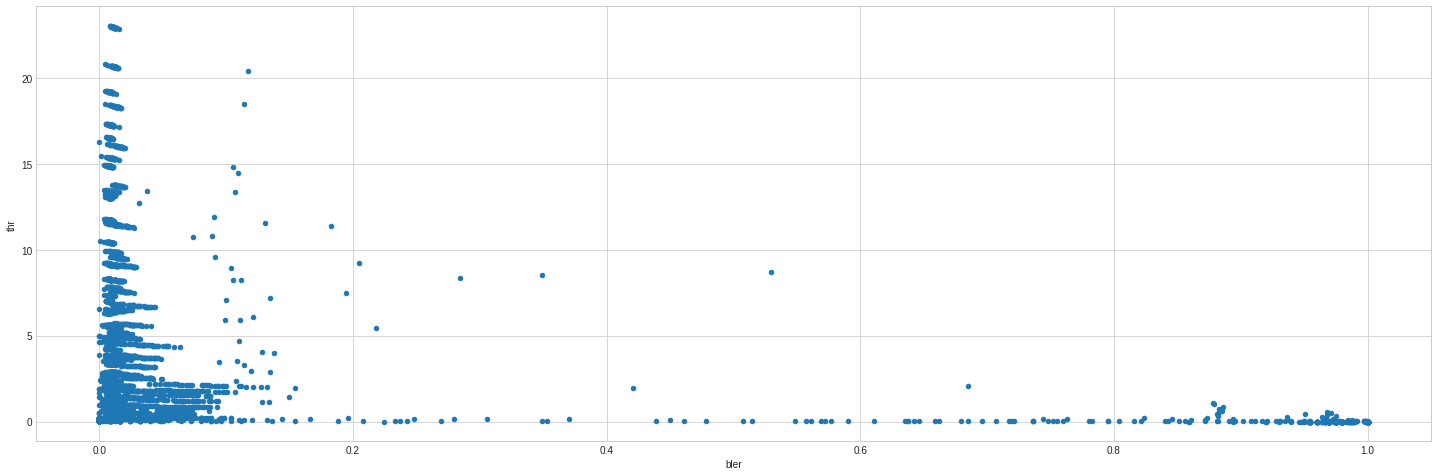

In [18]:
# BLER VS Throughput
'"As Block error rate increases throughput decreases"'

ener_data.plot(x ='bler', y='thr', kind = 'scatter', figsize=(25,8))

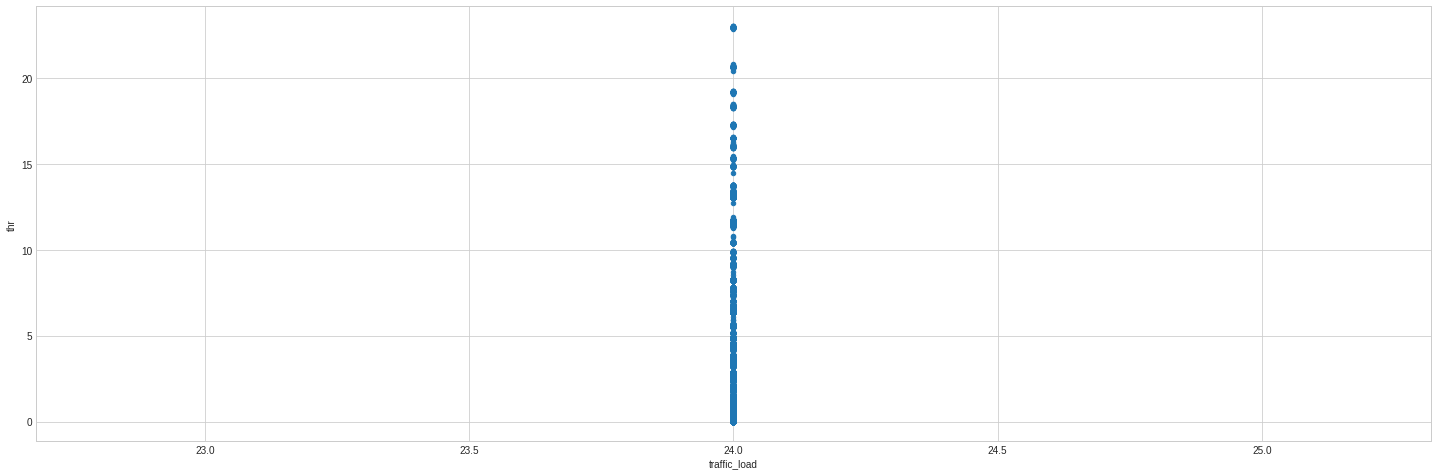

In [19]:
#Traffic load is constant at 24

ener_data.plot(x ='traffic_load', y='thr', kind = 'scatter', figsize=(25,8))

**3. Analysing effect of power on various parameters**

In [20]:
ener_data.groupby('txgain')['pm_power'].max().sort_index()

txgain
20    12.14823
21    12.73765
22    12.31139
23    12.54332
24    12.88410
25    12.61973
26    13.23374
27    13.02720
28    13.93545
29    13.63502
30    13.75806
31    13.20491
32    14.12526
33    13.58599
34    13.39649
35    13.70807
36    13.45195
37    13.27559
38    13.93527
39    13.17502
40    13.15879
41    13.32075
42    13.85633
43    13.21317
44    13.25143
45    13.16699
46    13.06607
47    13.09082
48    13.07432
49    13.11943
50    13.24613
51    13.30151
52    13.56269
53    13.22897
54    13.98207
55    13.13593
56    13.27486
57    13.27420
58    13.28346
59    13.10994
60    13.03074
61    13.22632
62    13.26230
63    13.27566
64    13.06710
65    13.05846
66    13.18352
67    13.36544
68    13.32023
69    13.02004
70    13.39418
71    13.10882
72    13.13176
73    13.18615
74    13.23285
Name: pm_power, dtype: float64

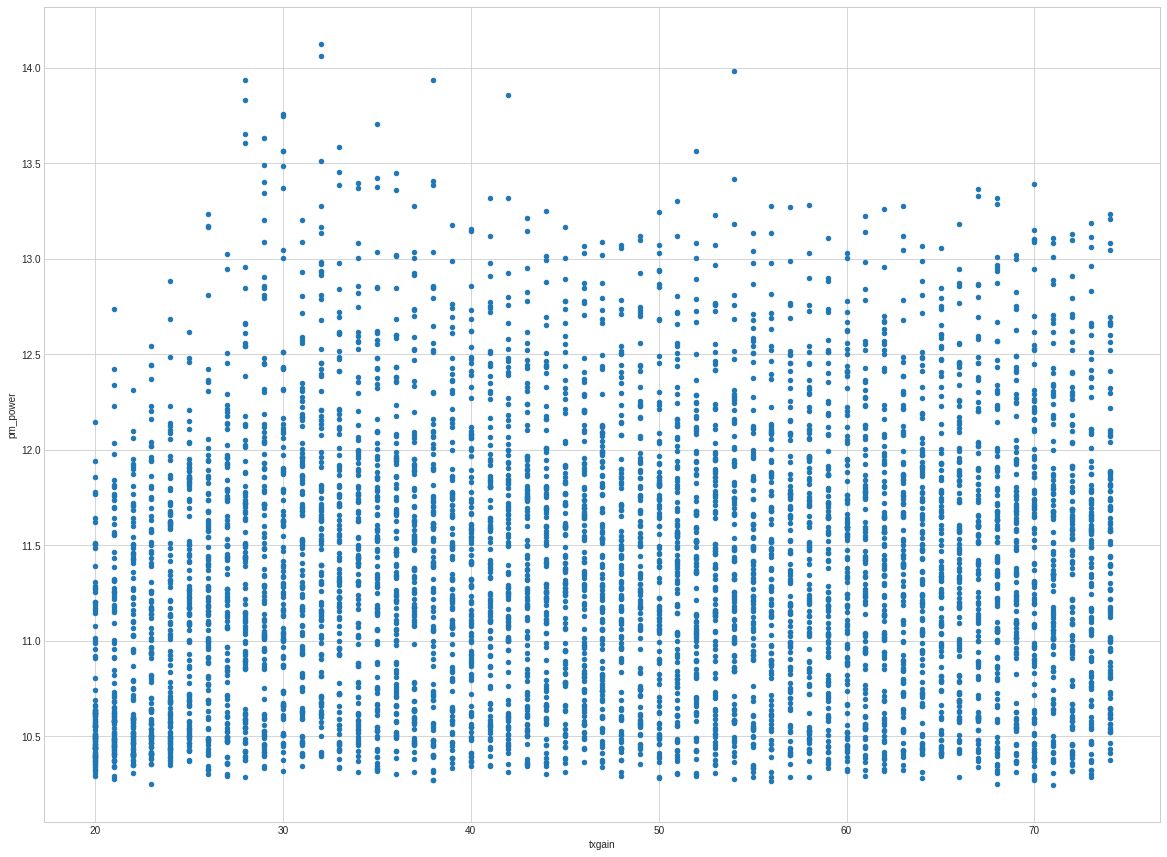

In [21]:
#Transmission gain VS Power

'"1. As transmission gain increases from values between 20 to 32 power increases and peaks out"'
'"2. Max Power requirement stays in the range of 13 to 13.5 for transmission gain between 33 to 70"'


ener_data.plot(x ='txgain', y='pm_power', kind = 'scatter', figsize=(20,15))


In [22]:
ener_data.groupby('selected_mcs')['pm_power'].max().sort_index()

selected_mcs
0     13.30151
3     13.48988
6     13.63502
9     12.87405
12    13.56269
15    13.93527
18    13.98207
21    13.85633
23    14.12526
Name: pm_power, dtype: float64

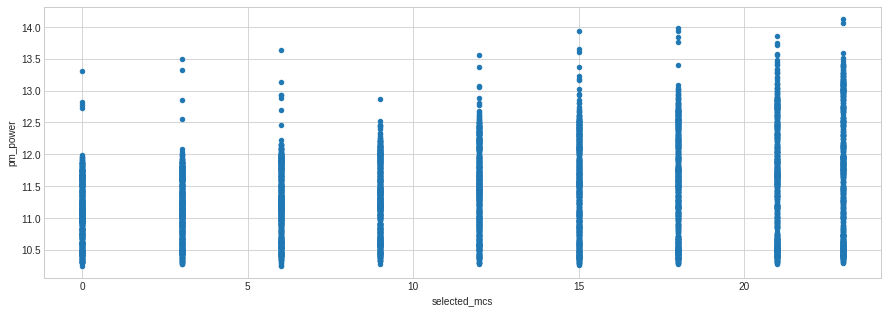

In [23]:
#MCS VS Power

'"As value of selected MCS increases power requirement increases"'

ener_data.plot(x ='selected_mcs', y='pm_power', kind = 'scatter', figsize=(15,5))


In [24]:
ener_data.groupby('mean_snr')['pm_power'].max().sort_index()

mean_snr
3.610000e-31    10.48002
6.180000e-02    10.50415
7.540000e-02    10.35481
7.576667e-02    10.53370
9.296667e-02    10.36927
                  ...   
3.492400e+01    10.37017
3.497000e+01    11.61058
3.497600e+01    10.60365
3.500000e+01    10.40835
3.501200e+01    10.52223
Name: pm_power, Length: 3767, dtype: float64

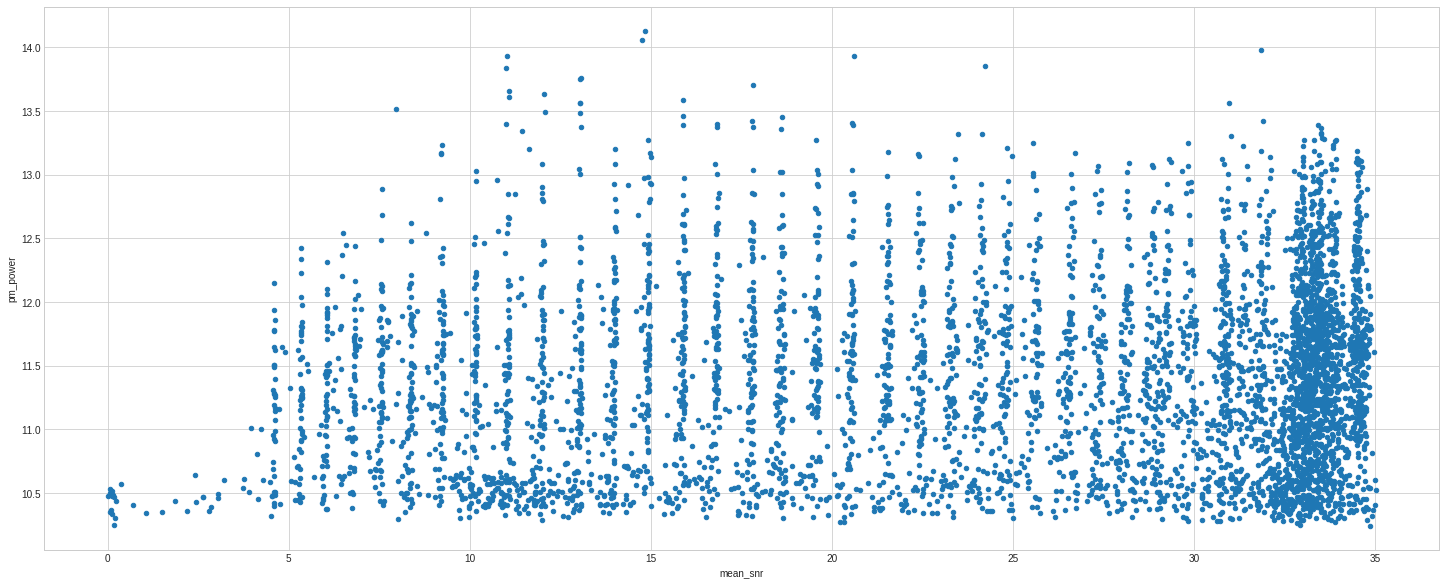

In [25]:
#SNR VS Power

'"1. As value of SNR is increased from 0 to 15 power requirement increases "'
'"2. For SNR values from 15 to 35 max power requirement is in the range of 13.0 to 13.5 "'

ener_data.plot(x ='mean_snr', y='pm_power', kind = 'scatter', figsize=(25,10))

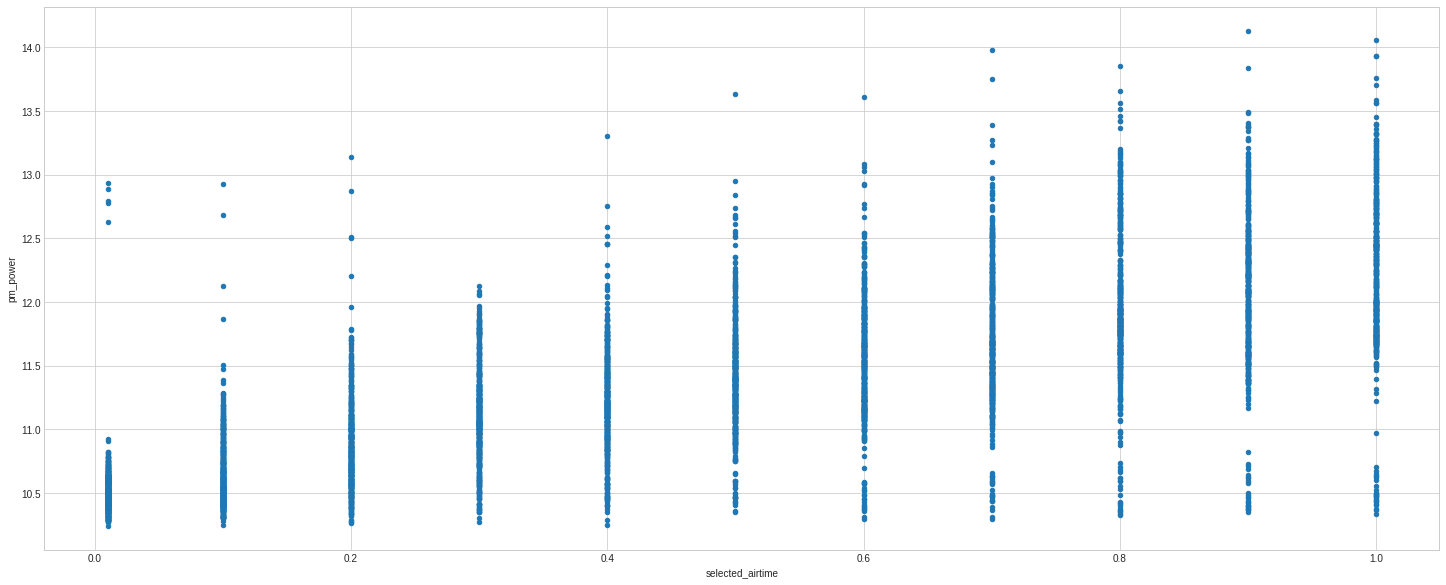

In [26]:
# Selected Airtime VS Power

'"As Airtime increases power requirement increases"'

ener_data.plot(x ='selected_airtime', y='pm_power', kind = 'scatter', figsize=(25,10))

In [27]:
ener_data.groupby('bler')['pm_power'].max().sort_index()

bler
0.000000    13.30151
0.000267    11.04912
0.000480    13.63502
0.000700    11.64593
0.000802    11.59448
              ...   
0.999460    11.97180
0.999800    11.95961
0.999880    11.75003
0.999900    11.32766
1.000000    12.73765
Name: pm_power, Length: 3933, dtype: float64

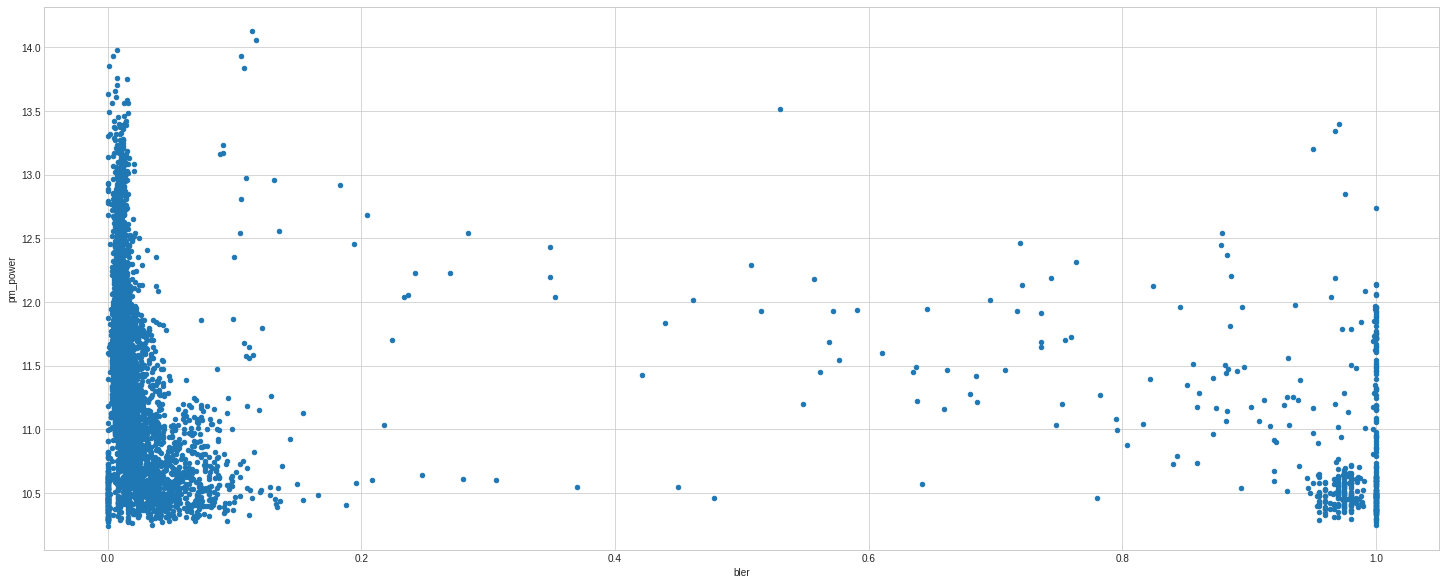

In [28]:
#BLER VS Power

'"1.At low BLER power requirement can be maxed out as throughput is high"'
'"2. At high BLER also power drawn is more because of losses but at the same time throughput is very low"'

ener_data.plot(x ='bler', y='pm_power', kind = 'scatter', figsize=(25,10))

**4. Transmission gain and SNR Relation**

In [29]:
ener_data.groupby('txgain')['mean_snr'].max().sort_index()

txgain
20    13.000000
21    12.875000
22    15.613659
23    17.900000
24    19.100000
25    17.333333
26    17.470000
27    19.400000
28    19.900000
29    20.345455
30    21.378250
31    16.845455
32    15.010000
33    15.954000
34    16.884000
35    17.906000
36    18.712000
37    19.674000
38    20.660000
39    21.658000
40    22.584000
41    23.514000
42    24.290000
43    24.974000
44    25.786000
45    26.762000
46    27.600000
47    28.380000
48    29.154000
49    29.724000
50    30.230000
51    31.020000
52    31.282000
53    32.024000
54    32.520000
55    32.986000
56    33.392000
57    33.616000
58    33.782000
59    33.852000
60    33.982000
61    33.392000
62    34.274000
63    34.264000
64    34.136000
65    34.298000
66    34.450000
67    34.656000
68    34.814000
69    34.924000
70    34.720000
71    34.860000
72    34.896000
73    35.000000
74    35.012000
Name: mean_snr, dtype: float64

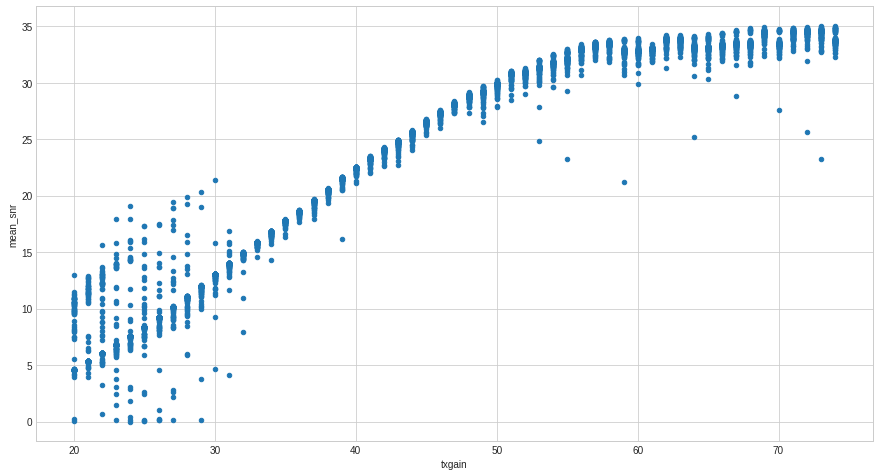

In [30]:
#Transmission gain VS Mean SNR

'"As Transmission gain increases SNR increases with peak SNR at 58 to 74 transmission gain"'

ener_data.plot(x ='txgain', y='mean_snr', kind = 'scatter', figsize=(15,8))

**5. Failed Experiment**

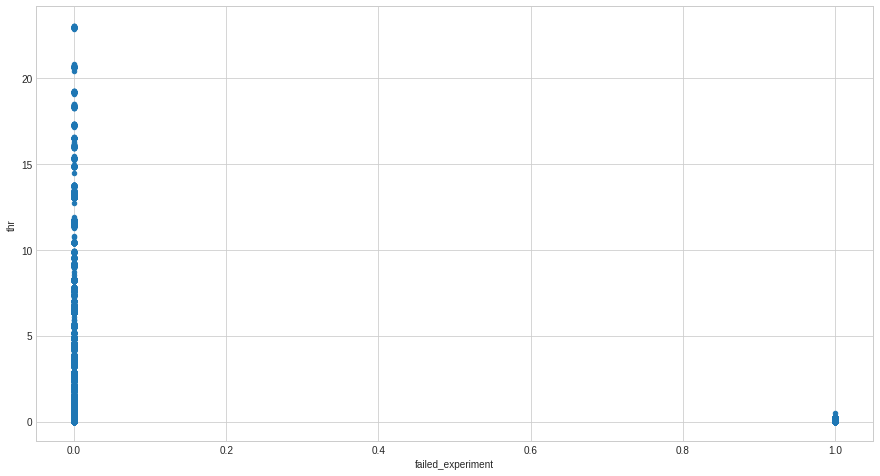

In [31]:
#Failed Experiment VS Throughput
ener_data.plot(x ='failed_experiment', y='thr', kind = 'scatter', figsize=(15,8))

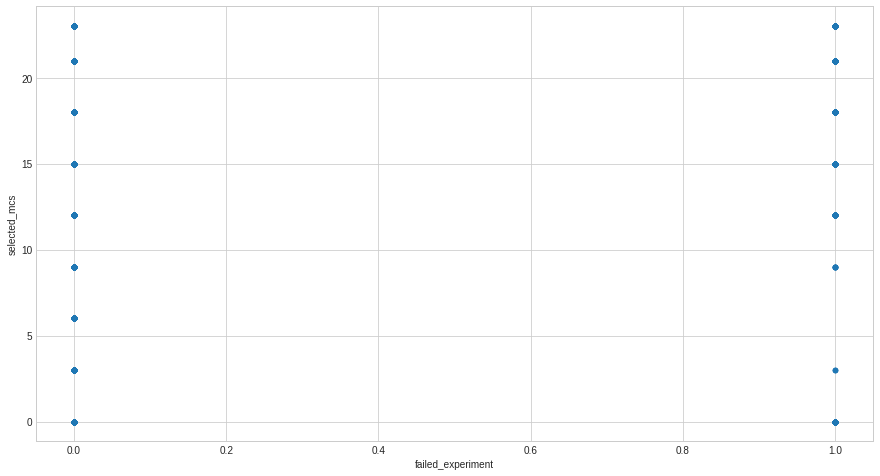

In [32]:
#Failed Experiment VS MCS
ener_data.plot(x ='failed_experiment', y='selected_mcs', kind = 'scatter', figsize=(15,8))

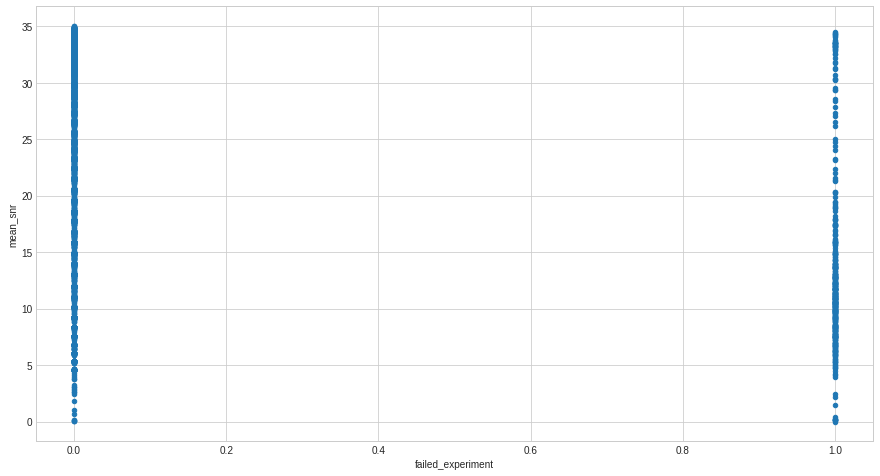

In [33]:
#Failed Experiment VS MCS
ener_data.plot(x ='failed_experiment', y='mean_snr', kind = 'scatter', figsize=(15,8))

In [34]:
data_corr= ener_data[['mean_snr','selected_mcs', 'pm_power']].corr()
data_corr

mean_snr  selected_mcs  pm_power
mean_snr      1.000000      0.022743  0.103636
selected_mcs  0.022743      1.000000  0.259096
pm_power      0.103636      0.259096  1.000000

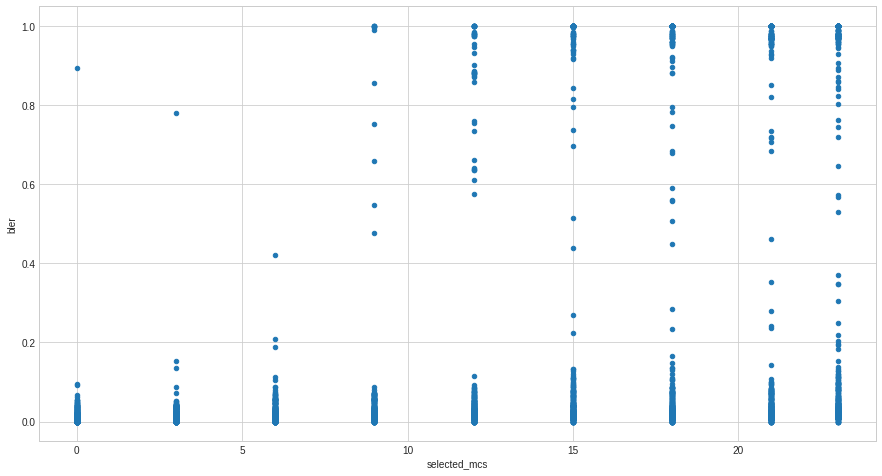

In [35]:
'"1. BLER error can be more at high value of MCS but also dependent on SNR than selected MCS"'
ener_data.plot(x ='selected_mcs', y='bler', kind = 'scatter', figsize=(15,8))

Text(0.5, 1.0, 'Power')

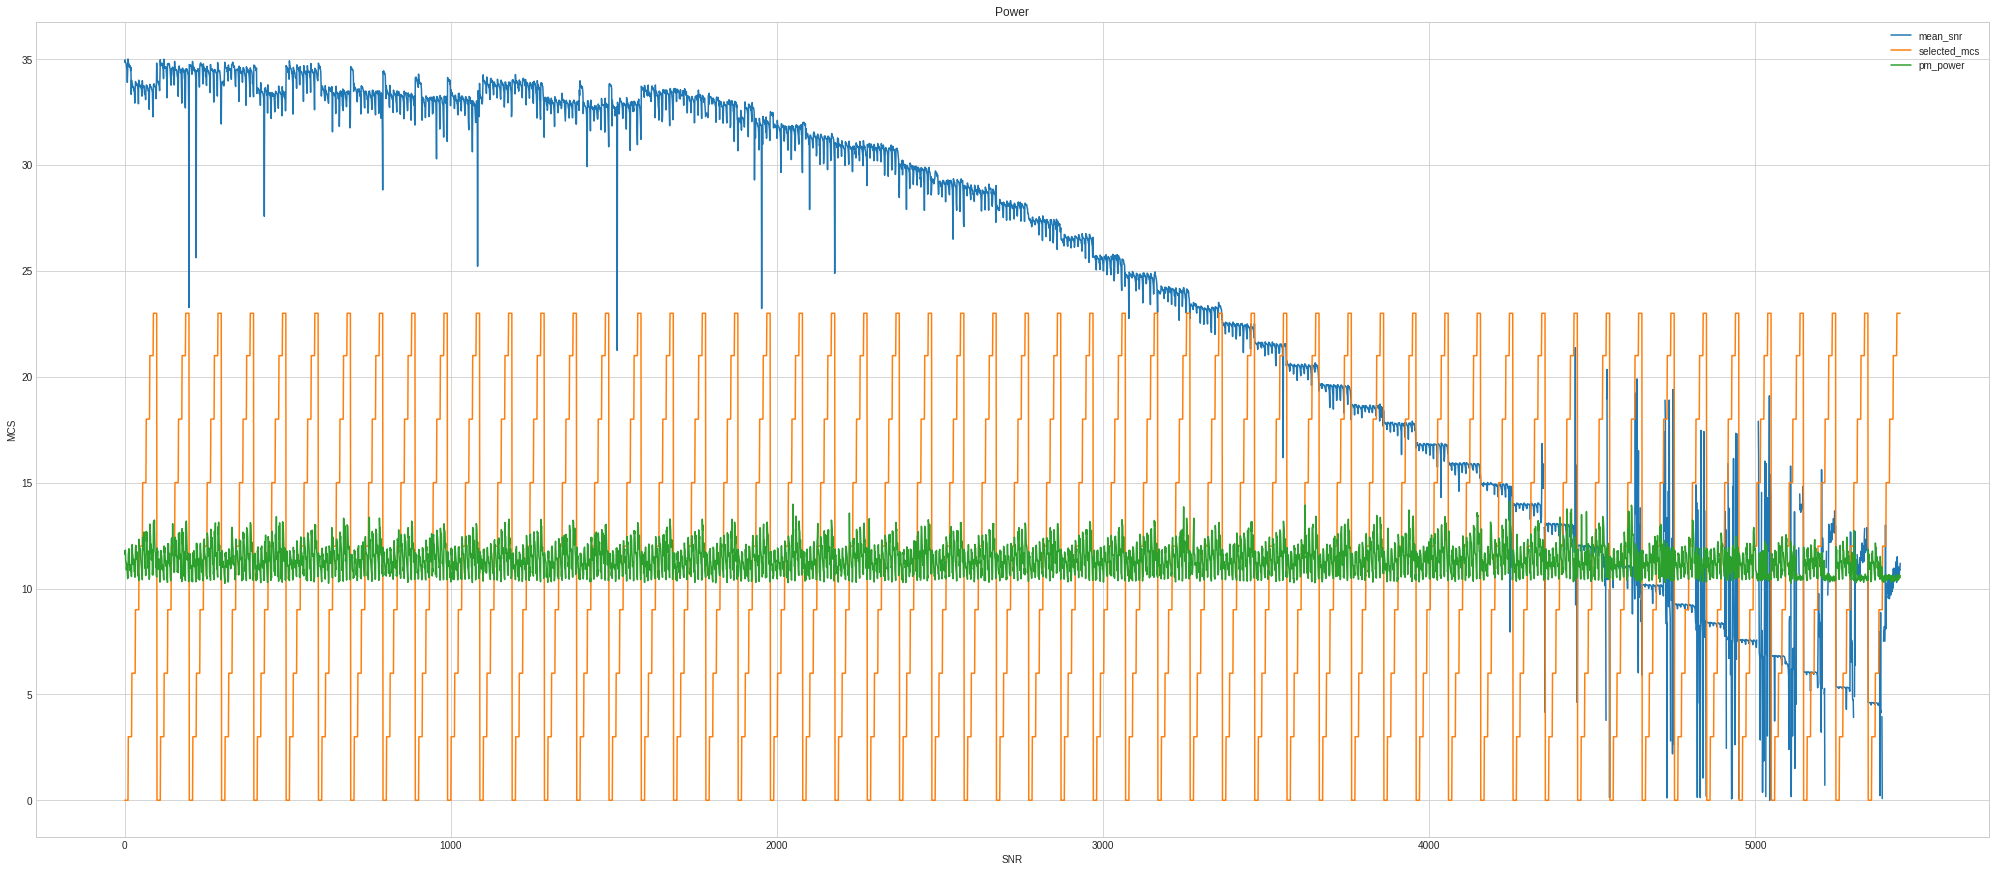

In [36]:
#Plot of power wrt SNR and MCS
'"1. MCS Selection and Power goes hand in hand as power increseses MCS increses and vice versa"'
'"2. Power is always above 10 and between 10-15 range and MCS selection is between 10-25"'
'"3. For lower values of power SNR is low, for higher values of SNR power requirement is more so is MCS "'
snr_plot= ener_data[['mean_snr','selected_mcs', 'pm_power']]
snr_plot.plot(figsize=(35,15))
plt.xlabel('SNR') 
plt.ylabel('MCS') 
plt.title('Power')

Text(0.5, 1.0, 'Throughput')

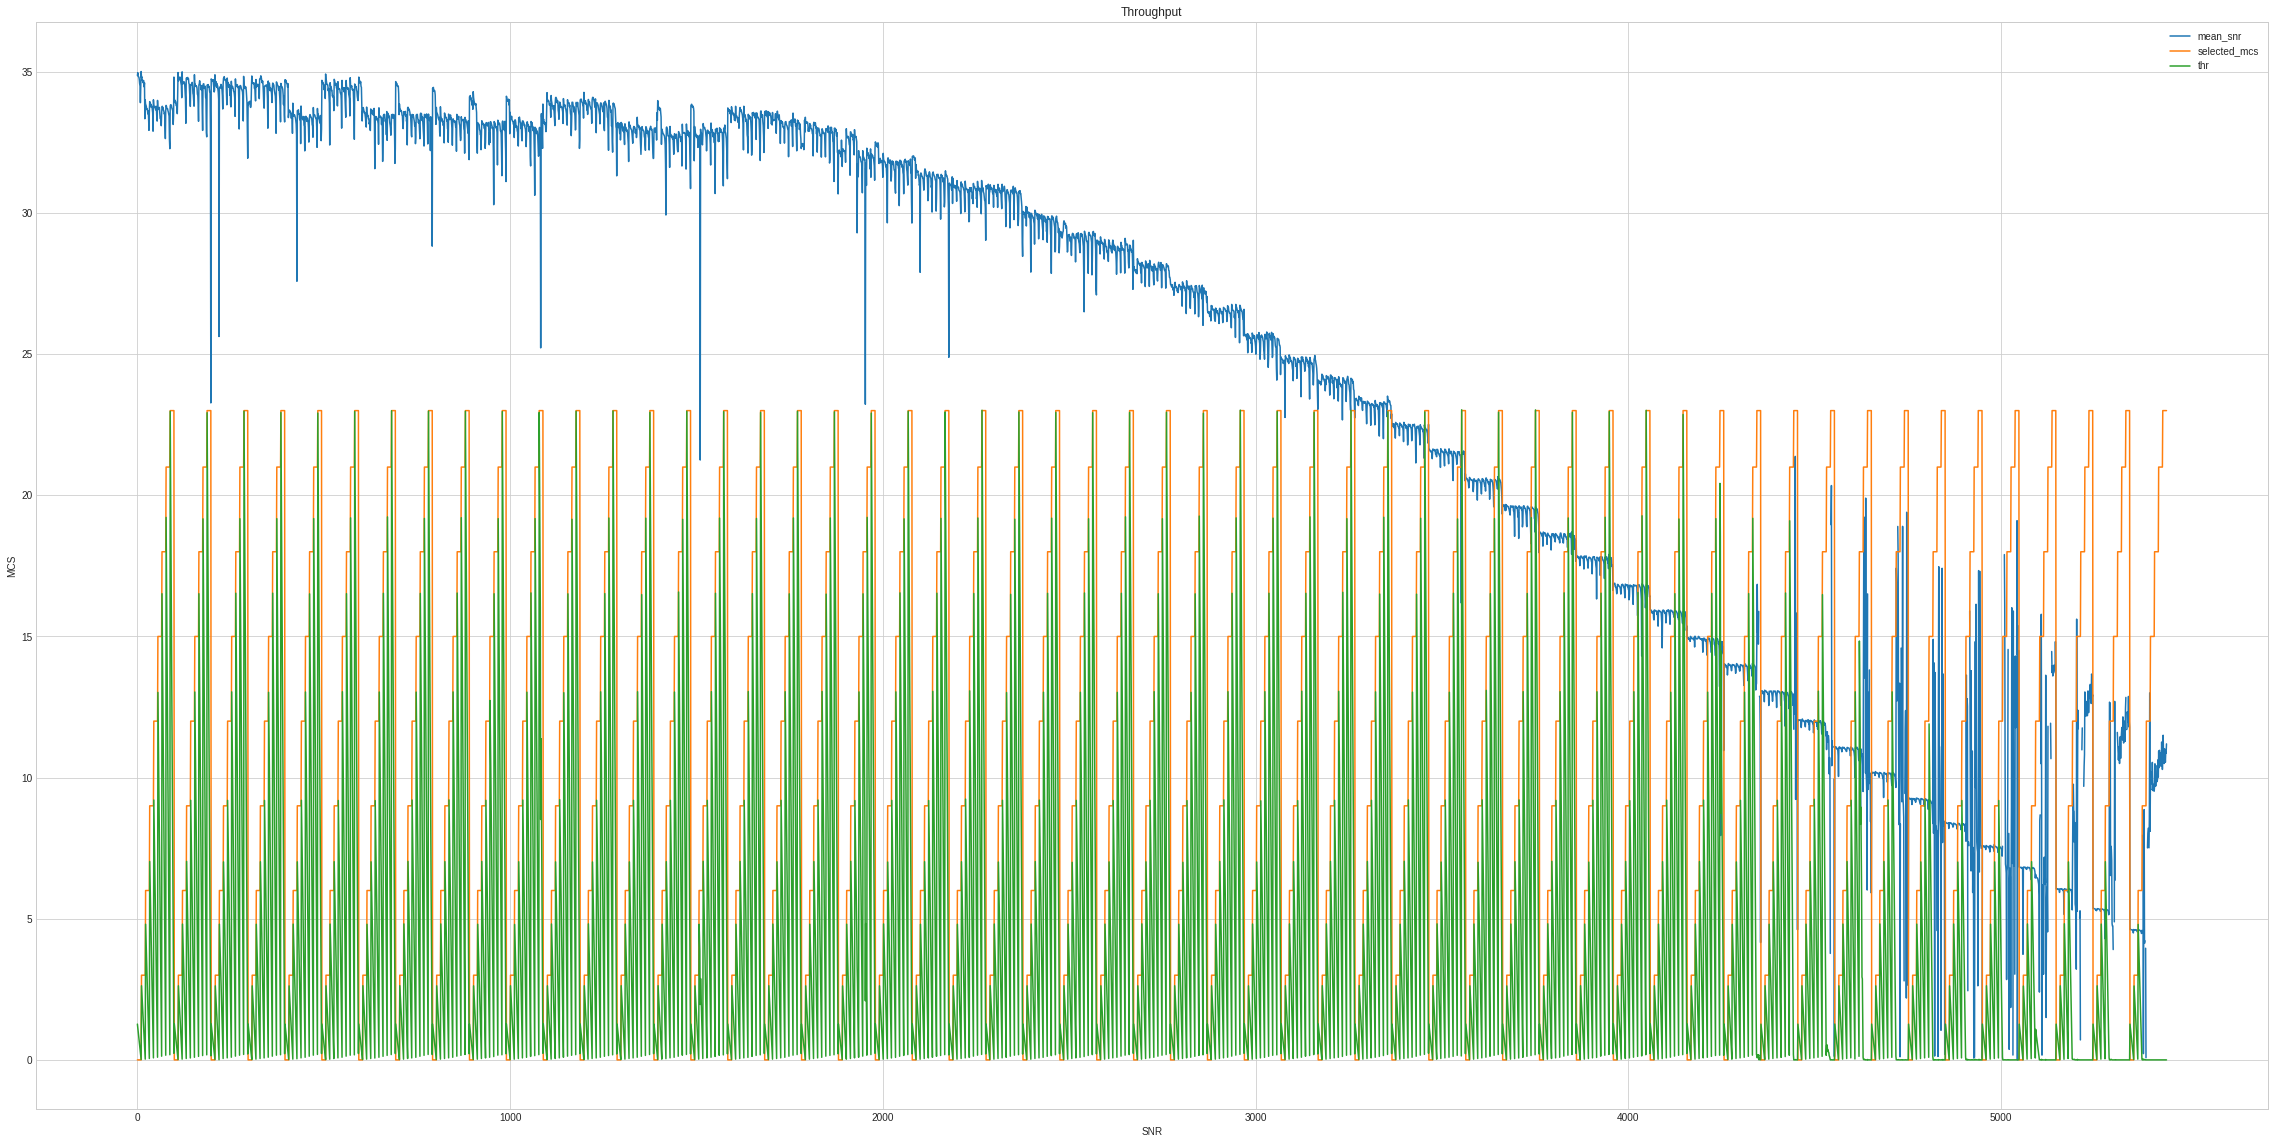

In [37]:
#Plot of Throughput wrt SNR and MCS
'"1. MCS Selection and Power goes hand in hand as power increseses MCS increses and vice versa"'
'"2. BLER VS MCS is same for all values at higher values of BLER SNR can be triggered too, while throughput decreases"'

snr_plot= ener_data[['mean_snr','selected_mcs', 'thr']]
snr_plot.plot(figsize=(40,20))
plt.xlabel('SNR') 
plt.ylabel('MCS') 
plt.title('Throughput')

Text(0.5, 1.0, 'BLER')

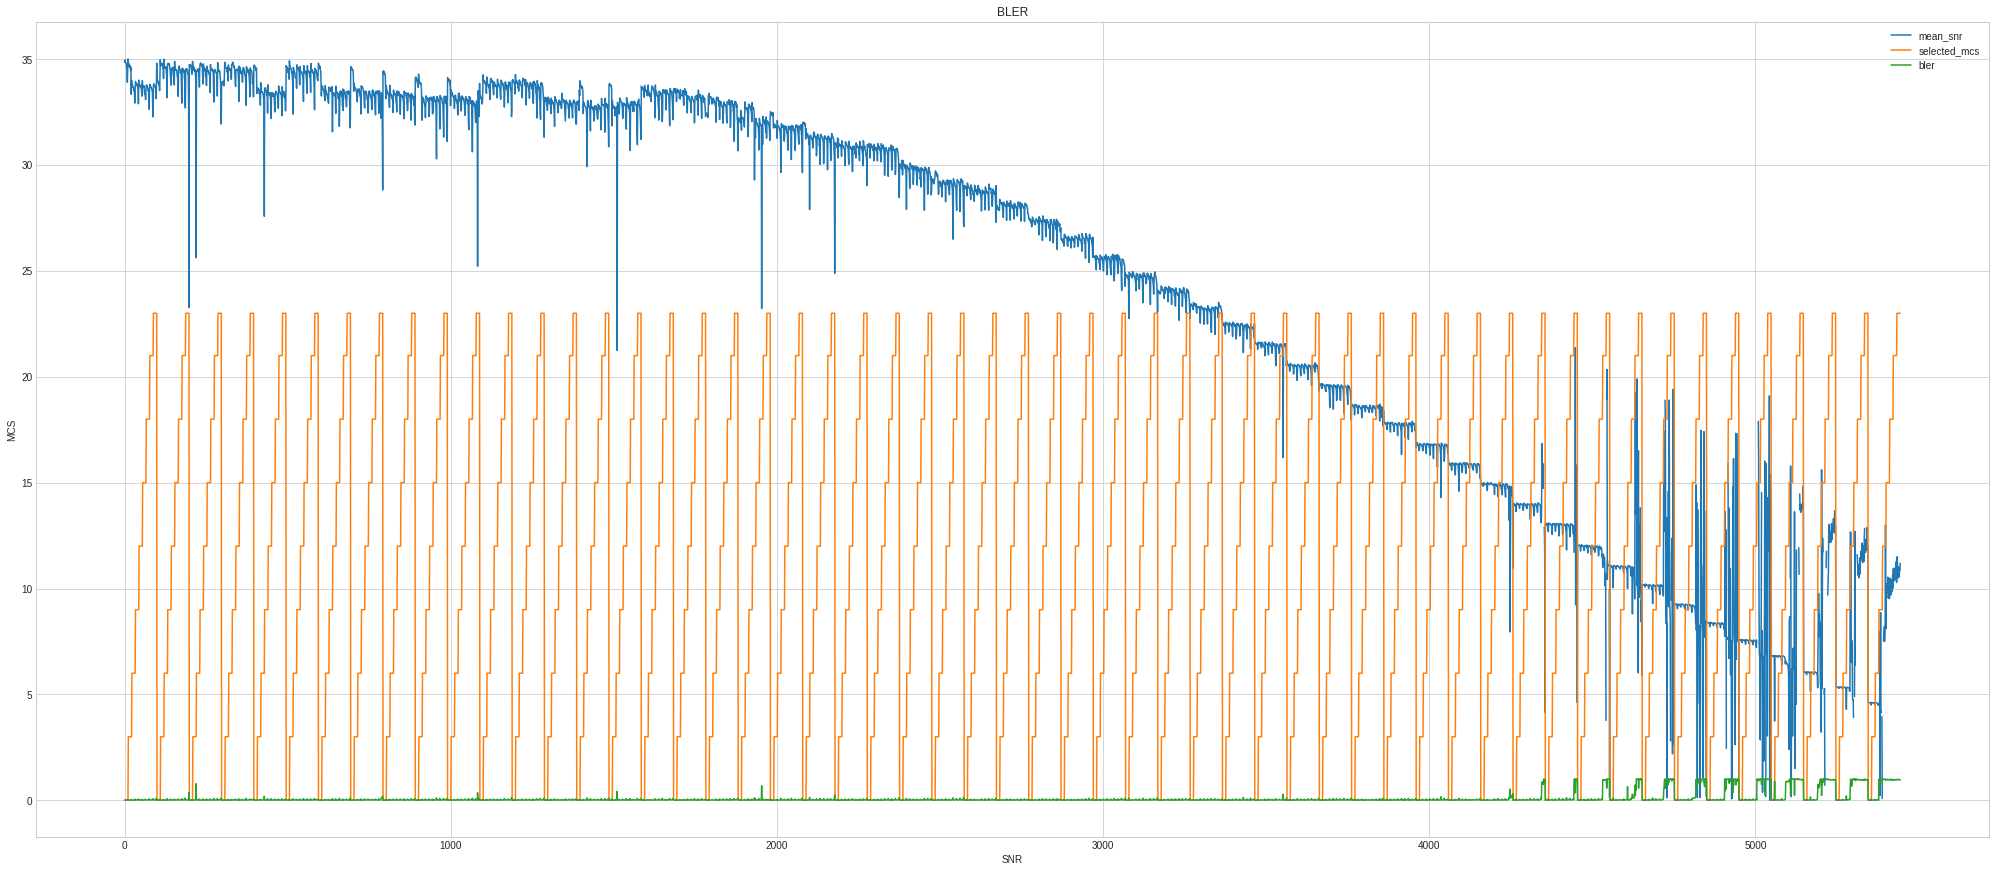

In [38]:
#Plot of BLER wrt SNR and MCS
'"1. MCS Selection varies between 0-23"'
'"2. BLER values are in line with MCS, BLER has more impact on SNR and Throughput "'

snr_plot= ener_data[['mean_snr','selected_mcs', 'bler']]
snr_plot.plot(figsize=(35,15))
plt.xlabel('SNR') 
plt.ylabel('MCS') 
plt.title('BLER')

**Value of airtime is 1**






No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

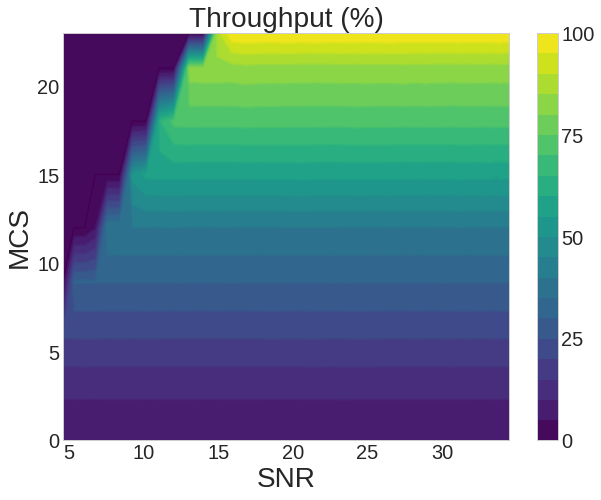

In [39]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 1

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

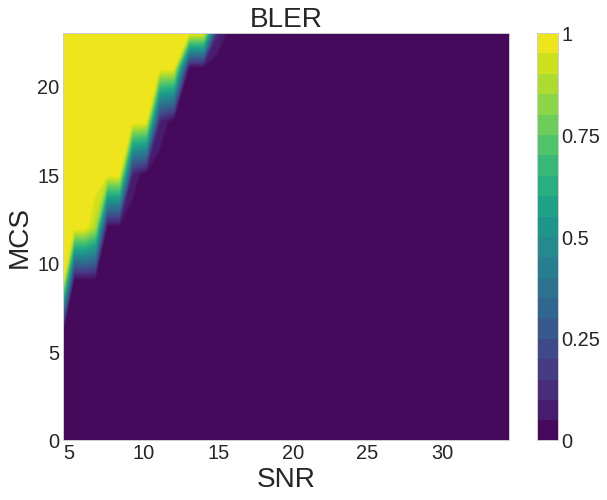

In [40]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


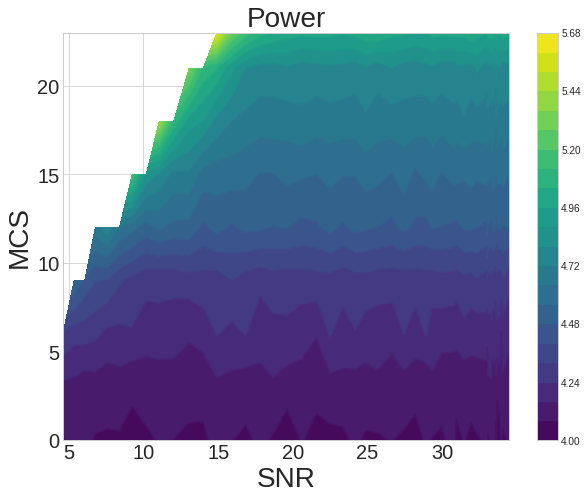

In [41]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.9**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

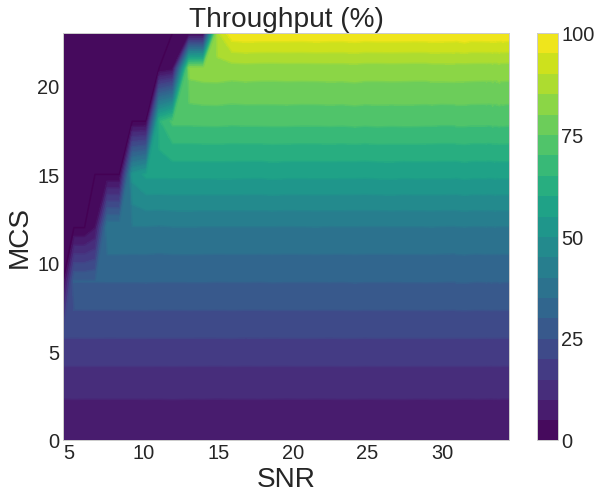

In [42]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.90

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

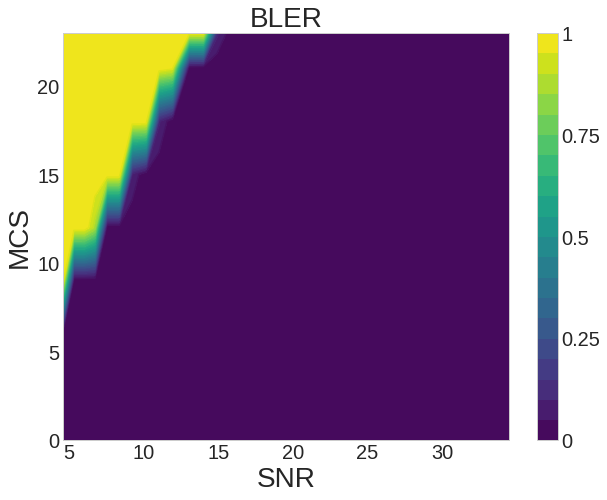

In [43]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


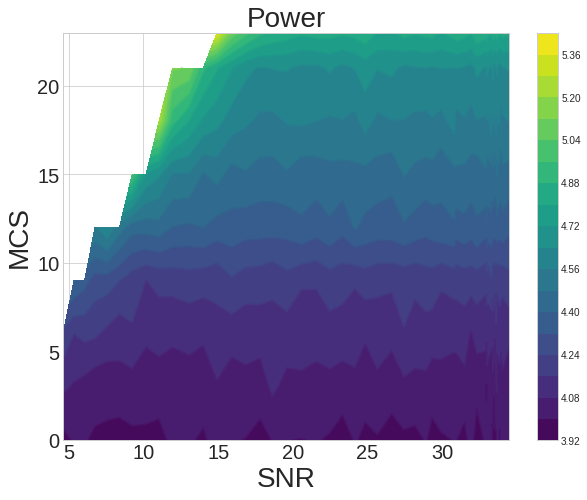

In [44]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.8**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

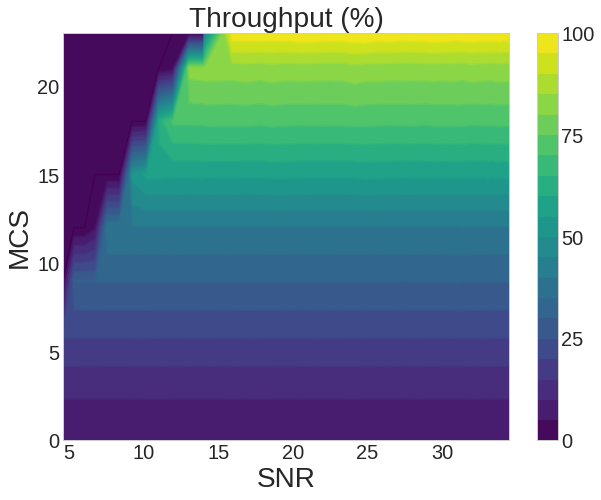

In [45]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.80

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

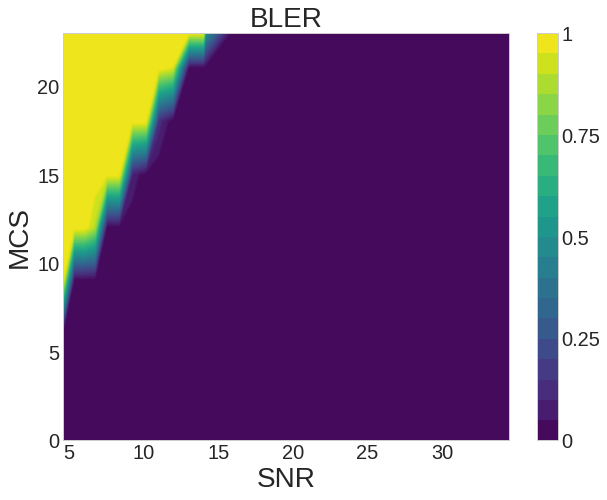

In [46]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


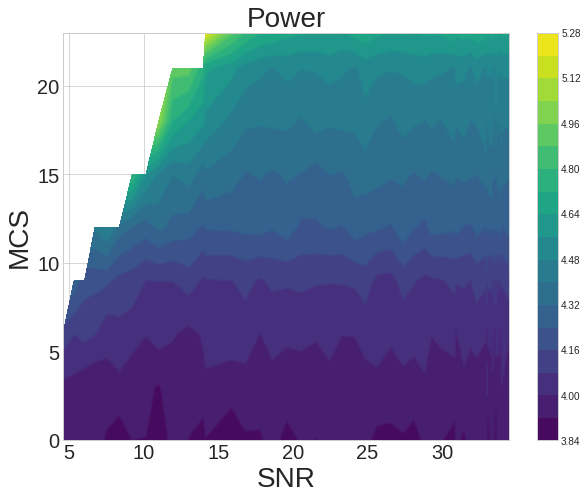

In [47]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.7**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

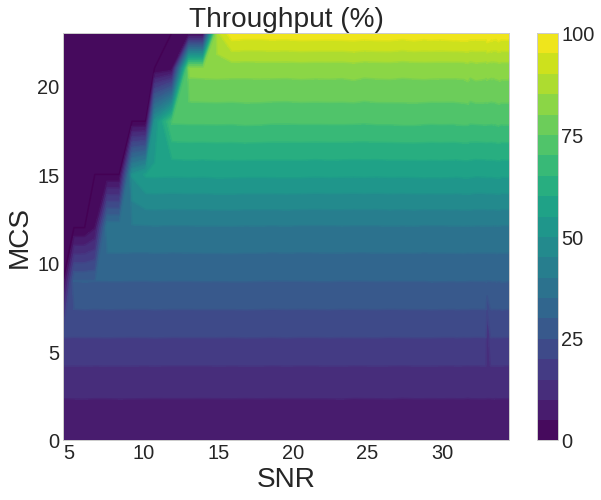

In [48]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.70

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

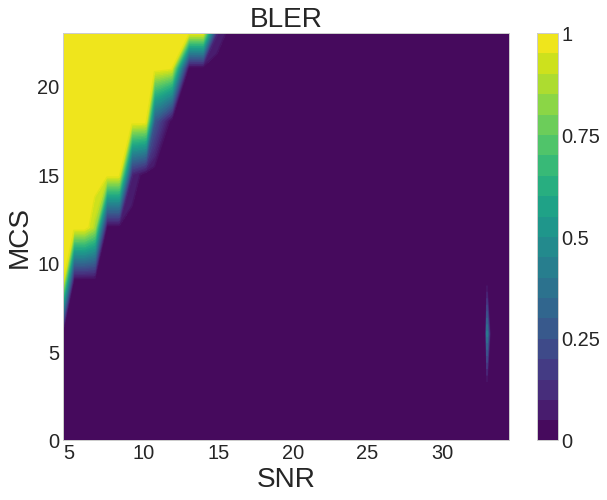

In [49]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


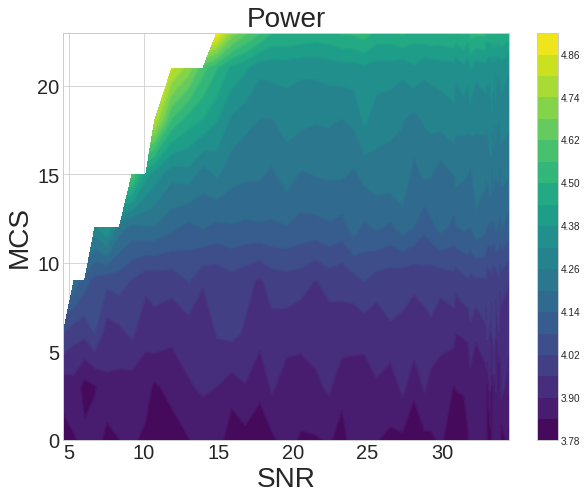

In [50]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.6**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

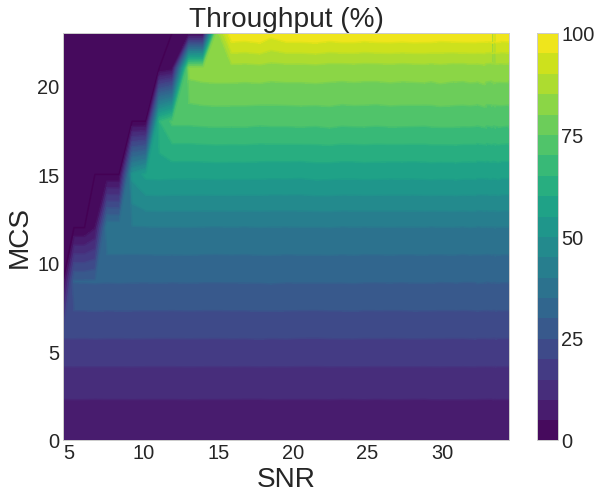

In [51]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.60

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

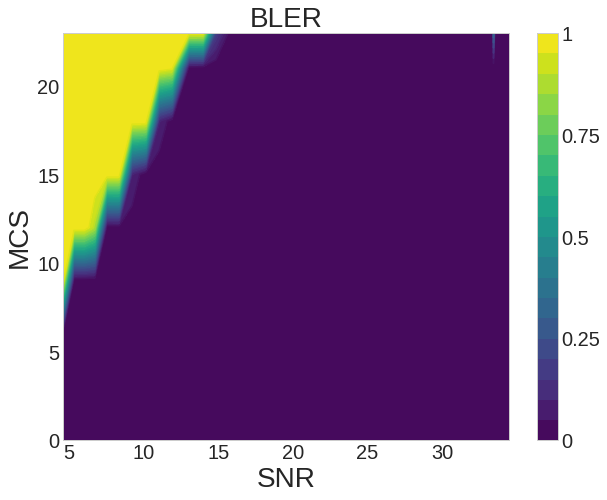

In [52]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


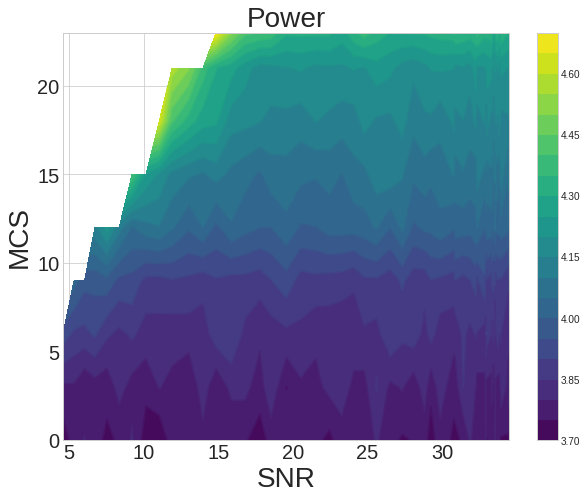

In [53]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.5**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

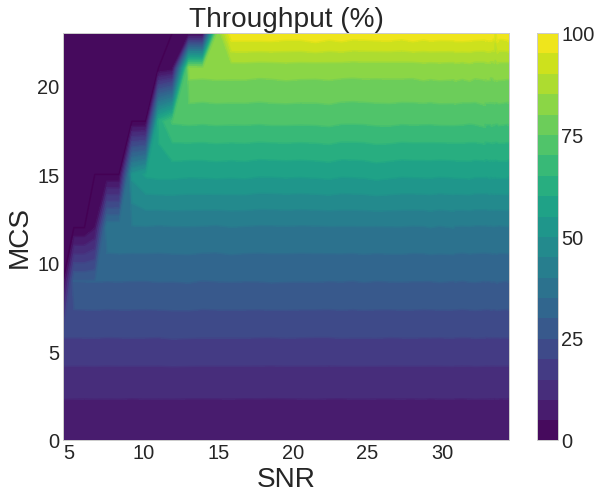

In [54]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.50

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

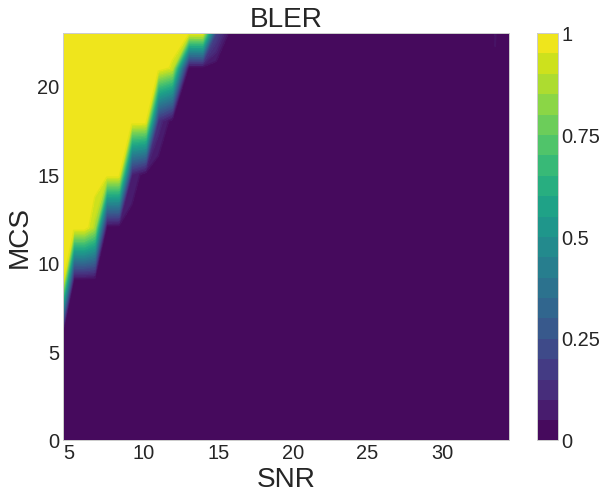

In [55]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


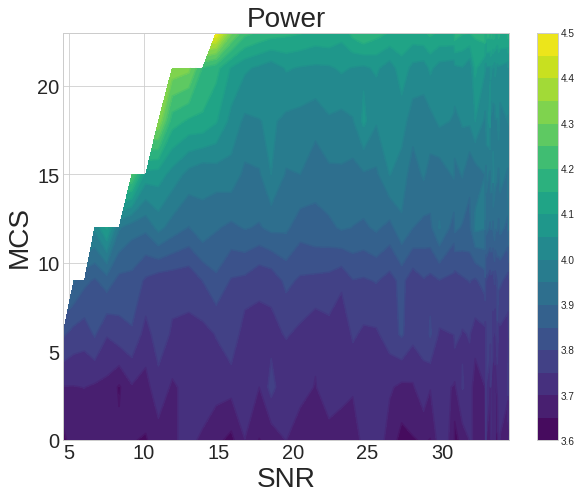

In [56]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.4**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

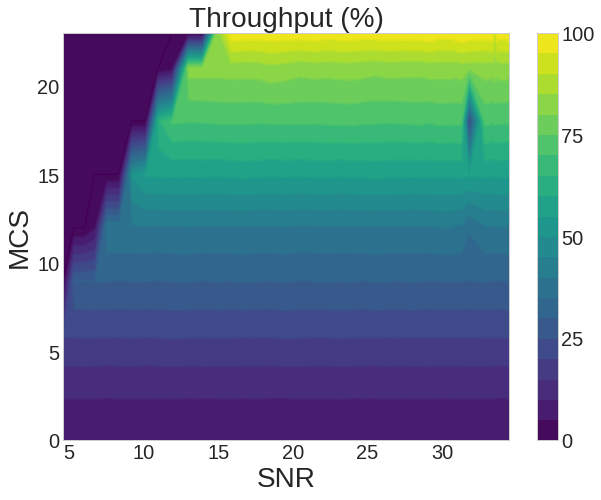

In [57]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.40

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

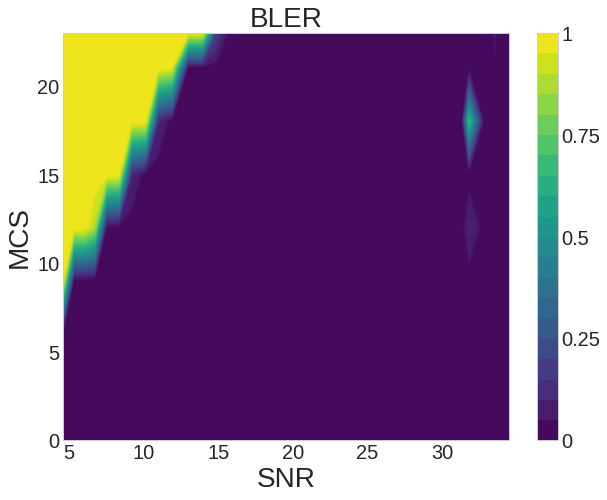

In [58]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


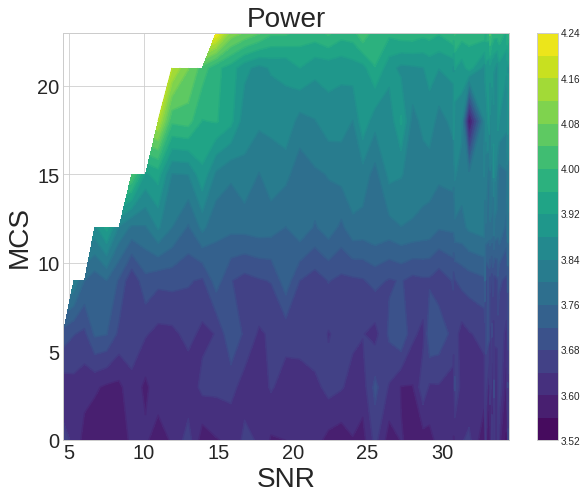

In [59]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.3**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

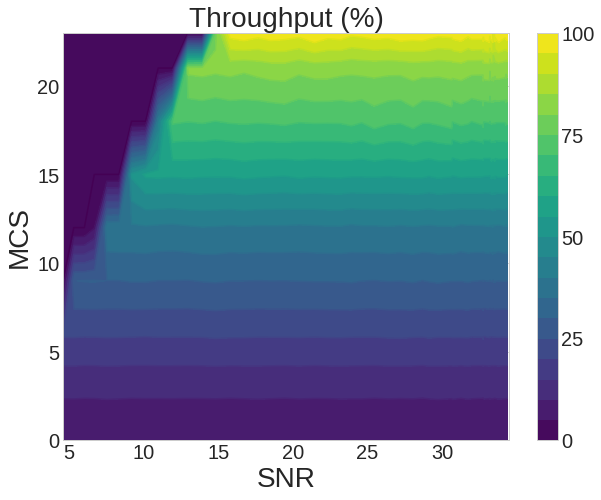

In [60]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.30

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

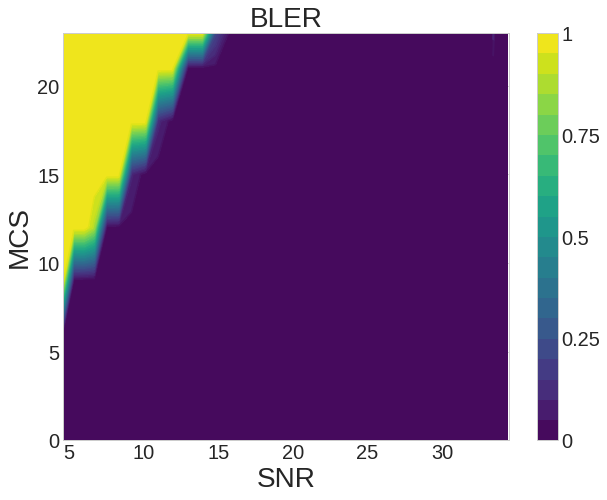

In [61]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


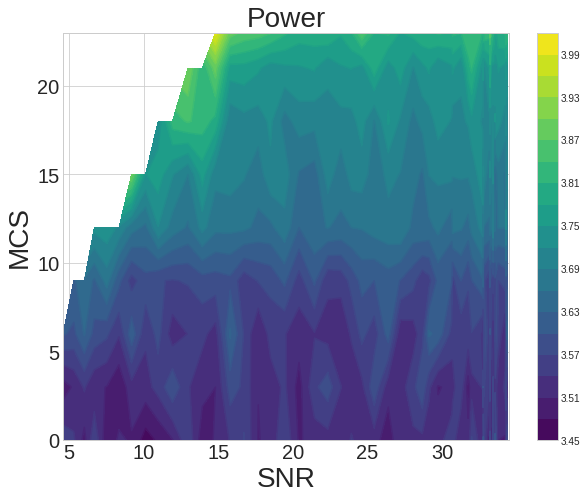

In [62]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.2**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

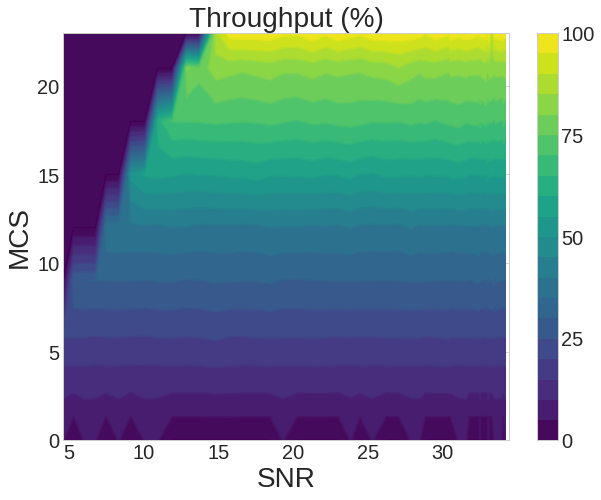

In [63]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.20

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

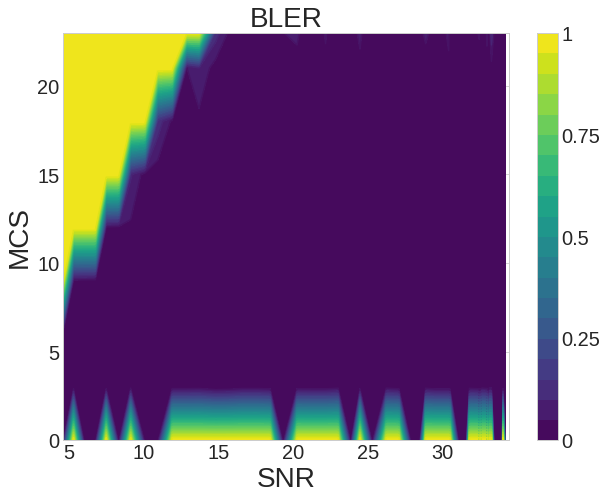

In [64]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


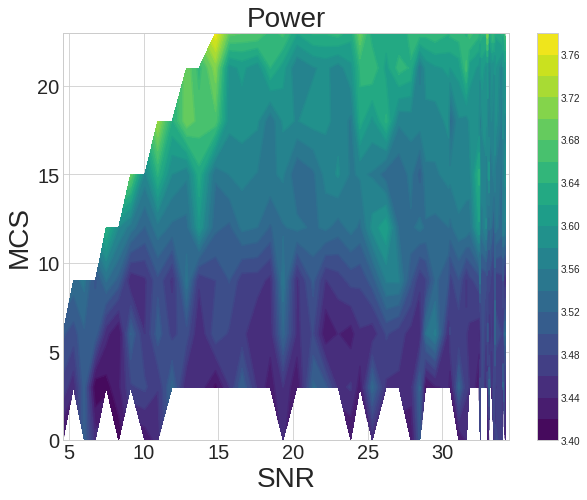

In [65]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.1**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

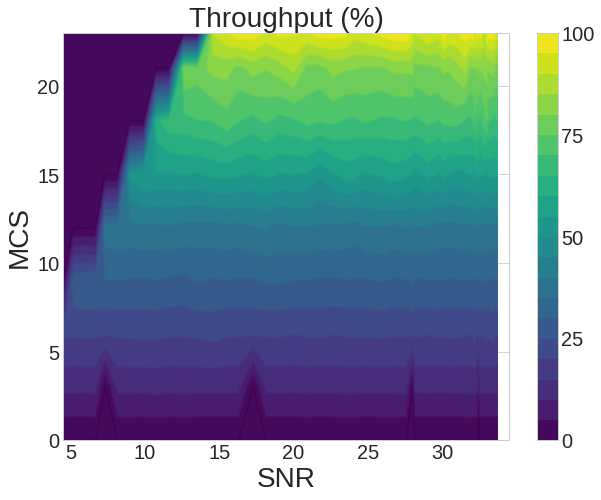

In [66]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.10

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

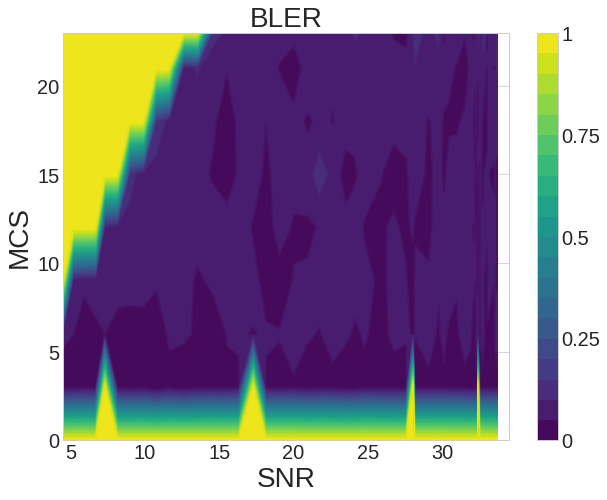

In [67]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


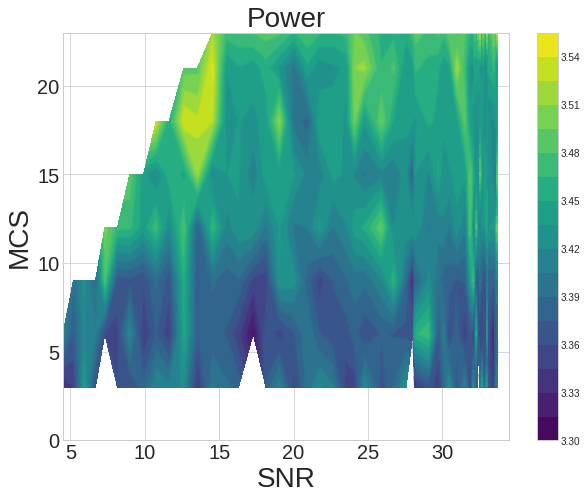

In [68]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


**Value of airtime is 0.01**

No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '25'),
 Text(1, 0, '50'),
 Text(1, 0, '75'),
 Text(1, 0, '100')]

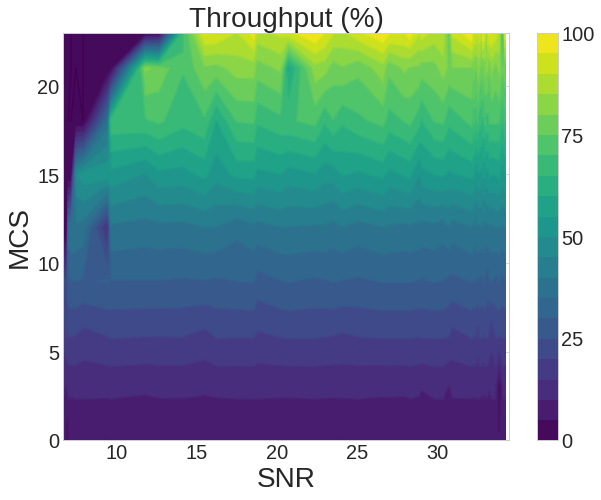

In [69]:
data = pd.read_csv("../content/drive/My Drive/PHD/2004210318_model2_dataset.csv") 

a = np.array(data['selected_airtime'])
c = np.array(data['mean_snr'])
m = np.array(data['selected_mcs'])

vals = np.array(data['rapl_power'])

failed = np.array(data['failed_experiment'])
idx = np.where(failed == 1)[0]
a = np.delete(a, idx)
c = np.delete(c, idx)
m = np.delete(m, idx)
vals = np.delete(vals, idx)

a_unique = np.unique(a)
m_unique = np.unique(m)

file_format = 'pdf'
colors_vals = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm', 'y', 'k']
lw_val = 4
scatter_size = 15

air = 0.01

mcs_unique = np.unique(data['selected_mcs'])
n_mcs = len(mcs_unique)
txgain_unique = np.unique(data['txgain'])#Machine LearningBandwidth of the LTE interface in number of resource block. For instance, BW = 50 -> 10 MHz
'"TM": Transmission mode'
'"UL/DL": Indicates if we consider the Uplink (UL), the downlink (DL), or both (DLUL)'
'"traffic_load_dl": Downlink traffic load'
'"traffic_load_ul": Uplink traffic load'
'"txgain_dl": Transmission gain of the USRP imple'
n_txgain = len(txgain_unique)

snr_vals = np.zeros((n_mcs, n_txgain))

for i in range(n_mcs):
    
    idx = (data['selected_mcs'] == mcs_unique[i]) & (data['selected_airtime'] == air)
    snr_vals[i,:] = data.loc[idx]['mean_snr']
    failed_experiment = np.array(data.loc[idx]['failed_experiment'])
    snr_vals[i,failed_experiment == 1] = np.nan
    


snr_ax = np.nanmean(snr_vals, axis=0)
txgain_ax = txgain_unique
mcs_ax = mcs_unique

thr_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
power_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 
bler_matrix = np.zeros((len(mcs_ax), len(txgain_ax))) 




for i1 in range(len(mcs_ax)):
    for i2 in range(len(txgain_ax)):

        idx = (data['selected_mcs'] == mcs_ax[i1]) & (data['txgain'] == txgain_ax[i2]) & (data['selected_airtime'] == air)
        failed_experiment = data.loc[idx]['failed_experiment'].item()
        thr_matrix[i1, i2] = data.loc[idx]['thr'] if failed_experiment == 0 else 0
        power_matrix[i1, i2] = data.loc[idx]['rapl_power'] if failed_experiment == 0 else np.nan
        bler_matrix[i1, i2] = data.loc[idx]['bler'] if failed_experiment == 0 else 1

N=20
cmap_val = 'viridis'
snr_ax = np.sort(snr_ax)
X, Y = np.meshgrid(snr_ax, mcs_ax)

# ---THROUGHPUT
fig = plt.figure(3, figsize=(10,7.5))
cax = plt.contourf(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
cax1 = plt.contour(X, Y, thr_matrix / np.nanmax(thr_matrix), N, cmap=cmap_val)
plt.title('Throughput (%)', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)



plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '25', '50', '75', '100'], fontsize=20)


No handles with labels found to put in legend.


[Text(1, 0, '0'),
 Text(1, 0, '0.25'),
 Text(1, 0, '0.5'),
 Text(1, 0, '0.75'),
 Text(1, 0, '1')]

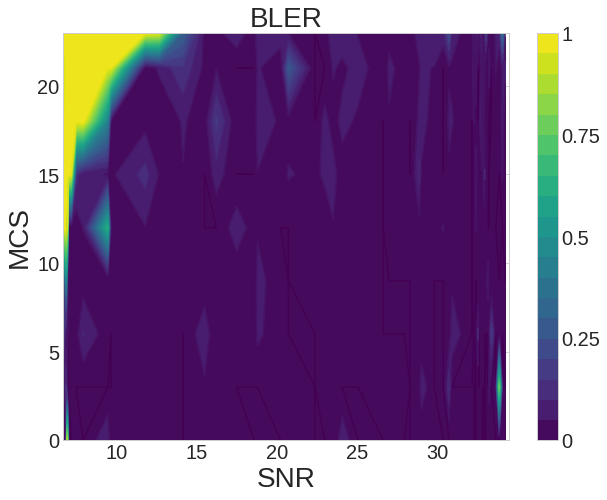

In [70]:
fig = plt.figure(4, figsize=(10,7.5))
cax1 = plt.contour(X, Y, bler_matrix, N, cmap=cmap_val)
cax = plt.contourf(X, Y, bler_matrix, N, cmap=cmap_val)
plt.title('BLER', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)


plt.legend(loc="best", fontsize=19)
cbar = fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
cbar.ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=20)

No handles with labels found to put in legend.


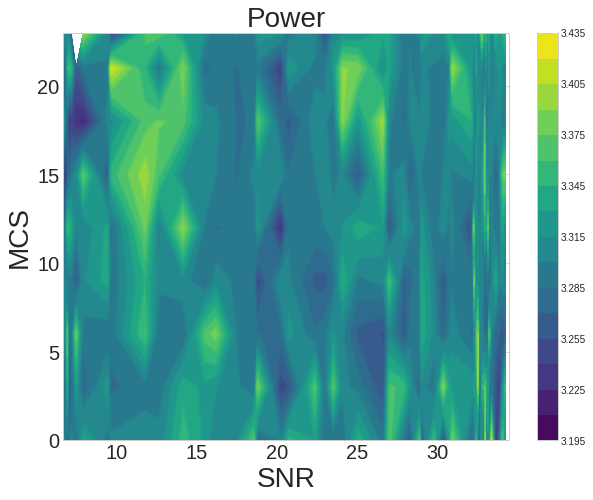

In [71]:
fig = plt.figure(6, figsize=(10,7.5))

p_matr = power_matrix 
cax1 = plt.contour(X, Y, p_matr, N, cmap=cmap_val)
cax = plt.contourf(X, Y, p_matr, N, cmap=cmap_val)


plt.title('Power', fontsize=28)
plt.ylabel('MCS', fontsize=28)
plt.xlabel('SNR', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(right=34.5)
plt.colorbar()

plt.legend(loc="best", fontsize=19)


In [72]:
ener_data['date'] = pd.to_datetime(ener_data['date'])

ener_data['date'] = ener_data['date'].dt.date

#ener_data['time'] = ener_data['date'].dt.time

ener_data

date  ... failed_experiment
0     2020-04-21  ...                 0
1     2020-04-21  ...                 0
2     2020-04-21  ...                 0
3     2020-04-21  ...                 0
4     2020-04-21  ...                 0
...          ...  ...               ...
5440  2020-04-25  ...                 1
5441  2020-04-25  ...                 1
5442  2020-04-25  ...                 1
5443  2020-04-25  ...                 1
5444  2020-04-25  ...                 0

[5445 rows x 40 columns]

In [73]:
df_powercons= ener_data[['selected_airtime','mean_snr','selected_mcs','pm_power','bler','txgain','thr']]
df_powercons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selected_airtime  5445 non-null   float64
 1   mean_snr          5389 non-null   float64
 2   selected_mcs      5445 non-null   int64  
 3   pm_power          5445 non-null   float64
 4   bler              5445 non-null   float64
 5   txgain            5445 non-null   int64  
 6   thr               5445 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 297.9 KB


In [74]:
df_powercons.columns

Index(['selected_airtime', 'mean_snr', 'selected_mcs', 'pm_power', 'bler',
       'txgain', 'thr'],
      dtype='object')

In [75]:
df_powercons.isnull().sum()

selected_airtime     0
mean_snr            56
selected_mcs         0
pm_power             0
bler                 0
txgain               0
thr                  0
dtype: int64

In [76]:
#null values found in total bookings replacing with random values
'"replacing na values with random"'

df_powercons["mean_snr"]=df_powercons["mean_snr"].fillna(0)
df_powercons.isnull().sum()

selected_airtime    0
mean_snr            0
selected_mcs        0
pm_power            0
bler                0
txgain              0
thr                 0
dtype: int64

In [77]:
df_powercons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selected_airtime  5445 non-null   float64
 1   mean_snr          5445 non-null   float64
 2   selected_mcs      5445 non-null   int64  
 3   pm_power          5445 non-null   float64
 4   bler              5445 non-null   float64
 5   txgain            5445 non-null   int64  
 6   thr               5445 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 297.9 KB


In [78]:
# Transforming Categorical features into numarical features
lb_en = LabelEncoder()
lb_en1 = LabelEncoder()
lb_en2 = LabelEncoder()
lb_en3 = LabelEncoder()
lb_en4 = LabelEncoder()
lb_en5 = LabelEncoder()
lb_en6 = LabelEncoder()

df_powercons.loc[:,'selected_airtime'] = lb_en.fit_transform(df_powercons.loc[:,'selected_airtime']) 
df_powercons.loc[:,'mean_snr'] = lb_en1.fit_transform(df_powercons.loc[:,'mean_snr']) 
df_powercons.loc[:,'selected_mcs'] = lb_en2.fit_transform(df_powercons.loc[:,'selected_mcs']) 
df_powercons.loc[:,'pm_power'] = lb_en3.fit_transform(df_powercons.loc[:,'pm_power']) 
df_powercons.loc[:,'bler'] = lb_en4.fit_transform(df_powercons.loc[:,'bler'])
df_powercons.loc[:,'txgain'] = lb_en5.fit_transform(df_powercons.loc[:,'txgain']) 
df_powercons.loc[:,'thr'] = lb_en6.fit_transform(df_powercons.loc[:,'thr']) 

In [79]:
from sklearn.model_selection import train_test_split
X = df_powercons.iloc[:,1:-1] # X value contains all the variables except labels
y = df_powercons.iloc[:,-1] # these are the labels

In [80]:
X

mean_snr  selected_mcs  pm_power  bler  txgain
0         3760             0      3886   131      54
1         3764             0      3400    10      54
2         3757             0      3944   764      54
3         3754             0      2538  1031      54
4         3749             0      2530   769      54
...        ...           ...       ...   ...     ...
5440       616             8       583  3890       0
5441       593             8       990  3882       0
5442       619             8       557  3899       0
5443       617             8       622  3882       0
5444       680             8       974  3857       0

[5445 rows x 5 columns]

In [81]:
y

0       1690
1       1607
2       1451
3       1336
4       1200
        ... 
5440      21
5441      54
5442       7
5443      57
5444      83
Name: thr, Length: 5445, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [83]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [85]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier(),
    "MLPClassifier" : MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)
}

In [87]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize

#Machine Learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

In [88]:
%%time
lr=LogisticRegression()
model = lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

CPU times: user 2min 15s, sys: 39.1 s, total: 2min 54s
Wall time: 2min 4s


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55        49
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          29       1.00      1.00      1.00         1
          30       0.00    

In [91]:
%%time
su=SVC()
model = su.fit(X_test, y_test)
prediction = su.predict(X_test)

CPU times: user 32.8 s, sys: 223 ms, total: 33 s
Wall time: 33.2 s


In [94]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[49  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]
              precision    recall  f1-score   support

           0       0.06      1.00      0.11        49
           1       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00

In [95]:
%%time
dt = DecisionTreeClassifier(random_state=0)
model = dt.fit(X_test, y_test)
prediction = dt.predict(X_test)

CPU times: user 1.32 s, sys: 0 ns, total: 1.32 s
Wall time: 1.32 s


In [96]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[49  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         1
          26       1.00      1.00      1.00         1
          28       1.00      1.00      1.00         1
          29       1.00      1.00      1.00         1
          31       1.00      1.00      1.00         1
          32       1.00      1.00